<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_11_Agrupacion/BA_Agrupacion_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

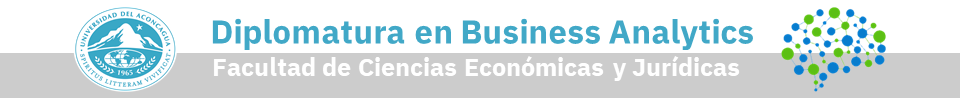

</center>

<center>
<font color="#41a8c7">
<h2><b>
Clustering caso de estudio: clustering en clientes mayoristas

</font>
</center>

#**Habilitando los módulos necesarios**

### Para el tratamiento de los datos

In [1]:
import pandas as pd
import numpy as np

### Para gráficos

In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# **Extracción de Datos - Creación del DataFrame**

In [3]:
archivo = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/credit_card.csv"

In [4]:
datos = pd.read_csv(archivo)
datos.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Análisis Exploratorio de los Datos**

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
datos.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Buscando los valores nulos para MINIMUN_PAYMENTS

In [7]:
datos[datos.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


Buscando los valores nulos para CREDIT_LIMIT

In [8]:
datos[datos.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


## **Visualizando los Datos**

### Histogramas

Generando histogramas para las columnas, menos ID

In [9]:
for i in datos.loc[:, datos.columns != 'CUST_ID']:
   fig = px.histogram(datos, x=datos[i],template="gridon",barmode="relative")
   fig.show()

### Mapas de Calor

Para ver correlación extrema, tanto positiva como negativa

In [10]:
datoscorrelacion = datos.corr()

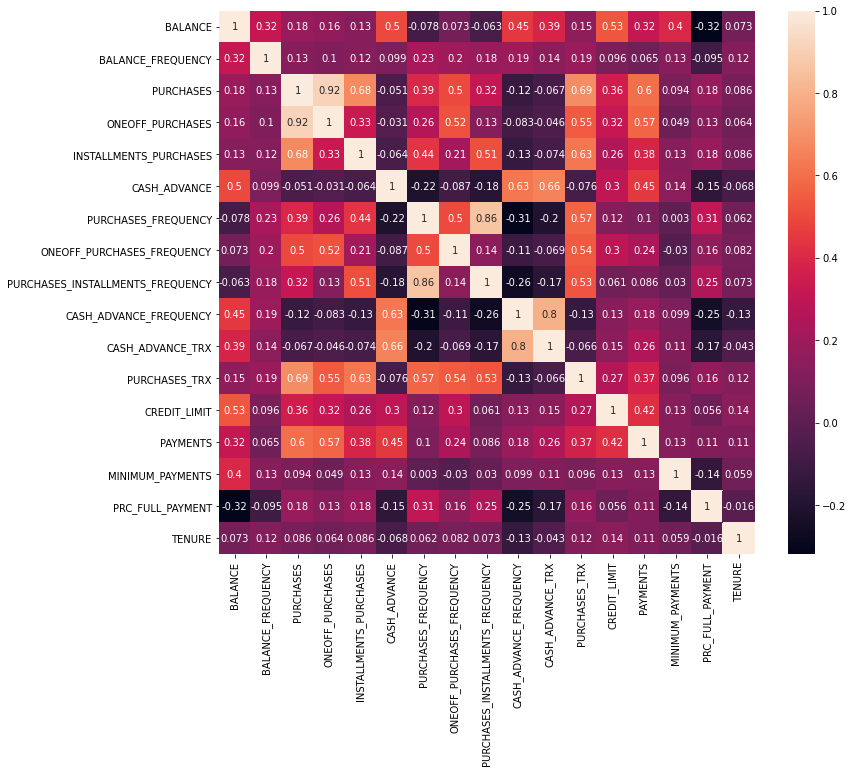

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(datoscorrelacion, 
            annot=True)

plt.show()

# **Preprocesamiento de los Datos**

## **Imputacion de los Datos nulos**

Estrategia de imputación con la media de los valores

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [14]:
datos['MINIMUM_PAYMENTS'] = imputer.fit_transform(datos['MINIMUM_PAYMENTS'].values.reshape(-1,1))

In [15]:
datos['CREDIT_LIMIT'] = imputer.fit_transform(datos['CREDIT_LIMIT'].values.reshape(-1,1))

## **Verificando Datos nulos**

In [16]:
datos.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# **Análisis de Componentes Principales - PCA**

## Seleccionando las variables sin ID

In [17]:
datosPCA = datos.loc[:, (datos.columns != 'CUST_ID')]

## Estandarizando

In [18]:
datosPCAstd = (datosPCA - datosPCA.mean(axis=0)) / datosPCA.std(axis=0)

## Creando Componentes Principales

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
datosPCA = pca.fit_transform(datosPCAstd)

## Convirtiendo en DataFrame

In [22]:
PCA_names = [f"PC{i+1}" for i in range(datosPCA.shape[1])]

In [23]:
datosPCA = pd.DataFrame(datosPCA, columns=PCA_names)
datosPCA.head()

,PC1,PC2
0,-1.683554,-1.072170
1,-1.134027,2.508955
2,0.969350,-0.383457
3,-0.888174,0.004616
4,-1.599929,-0.683727


## Graficando Análisis de Componentes Principales

In [24]:
fig = px.scatter(datosPCA, x="PC1",
                 y="PC2",
                 template="gridon",
                 title="Análisis de Componentes Principales")
fig.show()

## DataFrame de los Componentes Principales

In [25]:
dfPCA = pd.DataFrame(pca.components_.T,
                    columns=PCA_names,
                    index=datos.loc[:, (datos.columns != 'CUST_ID')].columns,)
dfPCA

,PC1,PC2
BALANCE,0.101735,0.403819
BALANCE_FREQUENCY,0.120490,0.131345
PURCHASES,0.411562,0.040024
ONEOFF_PURCHASES,0.346334,0.061916
INSTALLMENTS_PURCHASES,0.336761,-0.019172
CASH_ADVANCE,-0.022810,0.439026
PURCHASES_FREQUENCY,0.321232,-0.191147
ONEOFF_PURCHASES_FREQUENCY,0.294493,-0.018558
PURCHASES_INSTALLMENTS_FREQUENCY,0.274494,-0.178870
CASH_ADVANCE_FREQUENCY,-0.088582,0.434118


La PC1 se caracteriza por cuánto compra el propietario de la tarjeta con tarjeta

La PC2 se caracteriza por la cantidad que el propietario de la tarjeta recibe adelantos en efectivo con la tarjeta

In [26]:
dfPCA.style.highlight_max(color = 'lightgreen')

,PC1,PC2
BALANCE,0.101735,0.403819
BALANCE_FREQUENCY,0.120490,0.131345
PURCHASES,0.411562,0.040024
ONEOFF_PURCHASES,0.346334,0.061916
INSTALLMENTS_PURCHASES,0.336761,-0.019172
CASH_ADVANCE,-0.022810,0.439026
PURCHASES_FREQUENCY,0.321232,-0.191147
ONEOFF_PURCHASES_FREQUENCY,0.294493,-0.018558
PURCHASES_INSTALLMENTS_FREQUENCY,0.274494,-0.178870
CASH_ADVANCE_FREQUENCY,-0.088582,0.434118


# **Ingenieria de Caracteristicas**

In [27]:
datos['AVG_PURCHASE_TRX_PRICE'] = datos.loc[:,'PURCHASES']/datos.loc[:,'PURCHASES_TRX']

In [28]:
datos['AVG_PURCHASE_TRX_PRICE'] = datos.AVG_PURCHASE_TRX_PRICE.replace(np.NaN, 0)
datos['AVG_PURCHASE_TRX_PRICE'] = datos.AVG_PURCHASE_TRX_PRICE.replace(np.inf, 0)

In [29]:
datos['BALANCE_TO_CREDIT_LIMIT'] = datos.loc[:,'BALANCE']/datos.loc[:,'CREDIT_LIMIT']

In [30]:
datos['AVG_CASH_ADVANCE_TRX_AMOUNT'] = datos.loc[:,'CASH_ADVANCE']/datos.loc[:,'CASH_ADVANCE_TRX']

In [31]:
datos['AVG_CASH_ADVANCE_TRX_AMOUNT'] = datos.AVG_CASH_ADVANCE_TRX_AMOUNT.replace(np.NaN, 0)
datos['AVG_CASH_ADVANCE_TRX_AMOUNT'] = datos.AVG_CASH_ADVANCE_TRX_AMOUNT.replace(np.inf, 0)

# **Análisis de Clusters**

##Compras - Purchases - Preprocesamiento de los Datos

### Estandarizando los datos

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
kmeans_columns1 = ['AVG_PURCHASE_TRX_PRICE', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']

In [34]:
datos_kmeans1 = datos.loc[:, kmeans_columns1]

In [35]:
standardize = StandardScaler()
standardize

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
datos_kmeans1 = standardize.fit_transform(datos_kmeans1)

### Número óptimo de Clusters

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans_models = [KMeans(n_clusters=k, random_state=1).fit(datos_kmeans1) for k in range (1, 10)]

In [39]:
innertia = [model.inertia_ for model in kmeans_models]

In [40]:
clusters = pd.DataFrame()
clusters["range"]=range(1,10)
clusters["innertia"] = innertia
clusters

,range,innertia
0,1,26850.000000
1,2,20059.849357
2,3,15771.028068
3,4,12411.780625
4,5,10542.253431
5,6,8906.217502
6,7,7814.618636
7,8,6819.637480
8,9,5992.717463


In [41]:
fig = px.line(clusters,
             x=clusters.range,
             y=clusters.innertia,
             title="Metodo del codo",
             template="gridon")
fig.show()

### Generando Clusters

In [42]:
kmeans = KMeans(n_clusters=4, random_state = 1)

Agregando clusters al DataFrame

In [43]:
datos["CLUSTERS_PURCHASES"] = kmeans.fit_predict(datos_kmeans1)

In [44]:
datos["CLUSTERS_PURCHASES"] = datos["CLUSTERS_PURCHASES"].astype("category")

In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   CUST_ID                           8950 non-null   object  
 1   BALANCE                           8950 non-null   float64 
 2   BALANCE_FREQUENCY                 8950 non-null   float64 
 3   PURCHASES                         8950 non-null   float64 
 4   ONEOFF_PURCHASES                  8950 non-null   float64 
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64 
 6   CASH_ADVANCE                      8950 non-null   float64 
 7   PURCHASES_FREQUENCY               8950 non-null   float64 
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64 
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64 
 11  CASH_ADVANCE_TRX                  8950 non-null   int64 

##Adelantos de efectivo - Cash_Advance - Preprocesamiento de los Datos

### Estandarizando los datos

In [46]:
kmeans_columns2 = ['BALANCE', 'AVG_CASH_ADVANCE_TRX_AMOUNT']

In [47]:
datos_kmeans2 = datos.loc[:, kmeans_columns2]

In [48]:
datos_kmeans2 = standardize.fit_transform(datos_kmeans2)

### Generando Clusters

Agregando clusters al DataFrame

In [49]:
datos["CLUSTERS_CASH_ADVANCE"] = kmeans.fit_predict(datos_kmeans2)

In [50]:
datos["CLUSTERS_CASH_ADVANCE"] = datos["CLUSTERS_CASH_ADVANCE"].astype("category")

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   CUST_ID                           8950 non-null   object  
 1   BALANCE                           8950 non-null   float64 
 2   BALANCE_FREQUENCY                 8950 non-null   float64 
 3   PURCHASES                         8950 non-null   float64 
 4   ONEOFF_PURCHASES                  8950 non-null   float64 
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64 
 6   CASH_ADVANCE                      8950 non-null   float64 
 7   PURCHASES_FREQUENCY               8950 non-null   float64 
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64 
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64 
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64 
 11  CASH_ADVANCE_TRX                  8950 non-null   int64 

# **División del Conjunto de Datos y Preprocesamiento**

In [53]:
X1 = datos.loc[:,kmeans_columns1]
y1 = datos['CLUSTERS_PURCHASES']

In [54]:
X2 = datos.loc[:,kmeans_columns2]
y2 = datos['CLUSTERS_CASH_ADVANCE']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Creando variables dummy

### Purchases

In [56]:
y1 = pd.get_dummies(y1)

In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify=y1, train_size=0.75, random_state=1)

In [58]:
scaler=MinMaxScaler()

In [59]:
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

### Cash Advance

In [60]:
y2 = pd.get_dummies(y2)

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, train_size=0.75, random_state=1)

In [62]:
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# **Desarrollando el modelo de aprendizaje no supervisado**

## Purchases

### Modelo Base - Baseline

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean, std

In [64]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train1,y_train1,cv=5)
print(mean(cv), '+/-', std(cv))

0.9912097057880291 +/- 0.001725471555881456


In [65]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train1,y_train1,cv=5)
print(mean(cv), '+/-', std(cv))

0.9922525919571926 +/- 0.0014605448328424947


### Óptimizacion de hiperparámetros

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Mejor Score: {} +/- {}'.format(str(classifier.best_score_),str(classifier.cv_results_['std_test_score'][classifier.best_index_])))
    print('Mejor Parametro: ' + str(classifier.best_params_))

In [68]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(5,12,1),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
              
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = False, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train1,y_train1)
clf_performance(best_clf_knn,'KNN')

KNN
Mejor Score: 0.9929976374711064 +/- 0.0020861861578427886
Mejor Parametro: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [69]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': np.arange(5,10,1), 
               'bootstrap': [True,False], 
               'max_features': ['auto','sqrt'],
               'min_samples_leaf': np.arange(1,5,1),
               'min_samples_split': np.arange(1,5,1)}
               
clf_rf_rnd = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train1,y_train1)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Mejor Score: 0.992550432612442 +/- 0.0012479483475848188
Mejor Parametro: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 7}


### Modelo Final

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
rf = RandomForestClassifier(random_state = 1, bootstrap= False, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 7)
rf.fit(X_train1,y_train1)
y_pred1 = rf.predict(X_test1)

In [72]:
print('RandomForestClassifier test accuracy: {}'.format(accuracy_score(y_test1, y_pred1)))

RandomForestClassifier test accuracy: 0.9932975871313673


## Cash Advance

### Modelo Base - Baseline

In [73]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train2,y_train2,cv=5)
print(mean(cv), '+/-', std(cv))

0.9949342675439132 +/- 0.0019659259188088


In [74]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train2,y_train2,cv=5)
print(mean(cv), '+/-', std(cv))

0.9967220882580428 +/- 0.0028117348501790758


### Óptimizacion de hiperparámetros

In [75]:
best_clf_knn = clf_knn.fit(X_train2,y_train2)
clf_performance(best_clf_knn,'KNN')

KNN
Mejor Score: 0.9964242476027934 +/- 0.0017252678706618939
Mejor Parametro: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [76]:
best_clf_rf_rnd = clf_rf_rnd.fit(X_train2,y_train2)
clf_performance(best_clf_rf_rnd,'Random Forest')

Random Forest
Mejor Score: 0.9959771537130765 +/- 0.0024304776645338202
Mejor Parametro: {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}


### Modelo Final

In [77]:
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'distance')
knn.fit(X_train2,y_train2)
y_pred2 = knn.predict(X_test2)

In [78]:
print('KNN test accuracy: {}'.format(accuracy_score(y_test2, y_pred2)))

KNN test accuracy: 0.9964253798033958
